# Experiment 8

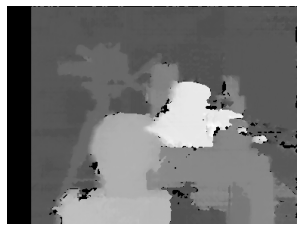

In [36]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

imgL = cv2.imread("abc.png",cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("abcd.png",cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoSGBM_create(numDisparities=32, blockSize=1, P1 = 15, P2 = 150, uniquenessRatio= 1, speckleWindowSize = 50, speckleRange = 1, preFilterCap = 20, disp12MaxDiff = 10)
disparity = stereo.compute(imgL,imgR)


plt.imshow(disparity,'gray'), plt.axis('off')
plt.show()

In [ ]:
import cv2 
import numpy as np

def update(x):
    pass

imgL = cv2.imread("abc.png",cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("abcd.png",cv2.IMREAD_GRAYSCALE)

window_size = 1
min_disp = 16
num_disp = 32
uniquenessRatio = 1
speckleRange= 1
speckleWindowSize = 50
disp12MaxDiff = 10

cv2.namedWindow("disparity")

cv2.createTrackbar("Speckle Range", "disparity", speckleRange, 50, update)
cv2.createTrackbar("Block Size", "disparity", window_size, 21, update)
cv2.createTrackbar("Speckle Window Size", "disparity", speckleWindowSize, 200, update)
cv2.createTrackbar("Uniqueness Ratio", "disparity", uniquenessRatio, 50, update)
cv2.createTrackbar("disp12MaxDiff", "disparity", disp12MaxDiff, 250, update)

while(True): 
    
    cv2.imshow("Reference Image", imgR)
    
    blockSize1 = cv2.getTrackbarPos("Block Size", "disparity")
    uniquenessRatio1 = cv2.getTrackbarPos("Uniqueness Ratio", "disparity")
    speckleWindowSize1 = cv2.getTrackbarPos("Speckle Window Size", "disparity")
    speckleRange1 = cv2.getTrackbarPos("Speckle Range", "disparity")
    disp12MaxDiff1 = cv2.getTrackbarPos("disp12MaxDiff", "disparity")
    
    stereo = cv2.StereoSGBM_create(
        numDisparities = num_disp,
        uniquenessRatio = uniquenessRatio1,
        speckleRange = speckleRange1,
        speckleWindowSize = speckleWindowSize1,
        disp12MaxDiff = disp12MaxDiff1,
        blockSize = blockSize1,
        P1 = 10,
        P2 = 100
    )
    disp = stereo.compute(imgL, imgR)

    cv2.imshow("disparity", (disp-min_disp)/num_disp)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27: 
        break

cv2.destroyAllWindows() 